In [18]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,precision_score

In [2]:
#Load Dataset
df=pd.read_csv('C:/Users/naval/OneDrive/Desktop/ML case Study.csv',header=0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


<Axes: xlabel='EXP (Month)', ylabel='CTC'>

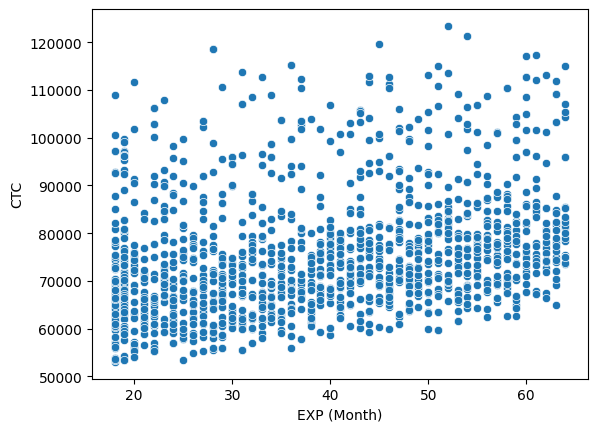

In [6]:
sns.scatterplot(x='EXP (Month)', y='CTC', data=df)


In [7]:
# removing colleges column
df=df.drop(['College'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 1589 non-null   object 
 1   Role                 1589 non-null   object 
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 87.0+ KB


In [9]:
df=pd.get_dummies(df, columns=['City', 'Role'], drop_first=True)

In [10]:
# Separate dependent and independent variables
y=df['CTC']
x=df.drop(['CTC'],axis=1)

In [11]:
# Split the dataset to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Fit models and evaluate
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}

# Print results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.2f}")

Linear Regression - MSE: 79819507.03, R2: 0.58
Ridge - MSE: 79900878.36, R2: 0.58
Lasso - MSE: 79761361.49, R2: 0.58
Random Forest - MSE: 71560259.19, R2: 0.62
Gradient Boosting - MSE: 73528528.83, R2: 0.61


In [13]:
# Define parameter grids for each model
param_grids = {
    'Ridge': {
        'alpha': [0.1, 1, 10, 100]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}


In [14]:

# Hyperparameter tuning and model fitting
tuned_results = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='r2')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        tuned_results[name] = {'Best Params': grid_search.best_params_, 'MSE': mse, 'R2': r2}
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        tuned_results[name] = {'MSE': mse, 'R2': r2}


In [15]:

# Print results
for name, metrics in tuned_results.items():
    print(f"{name} - Best Params: {metrics.get('Best Params', 'N/A')}, MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.2f}")

Linear Regression - Best Params: N/A, MSE: 79819507.03, R2: 0.58
Ridge - Best Params: {'alpha': 10}, MSE: 80895032.91, R2: 0.57
Lasso - Best Params: {'alpha': 100}, MSE: 78704627.28, R2: 0.59
Random Forest - Best Params: {'max_depth': 30, 'n_estimators': 100}, MSE: 72134597.14, R2: 0.62
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, MSE: 72517204.44, R2: 0.62


## *Questions*

### 1. Your views about the problem statement?

The problem statement appears to involve predicting a continuous target variable, CTC (likely representing a salary or compensation), based on various features such as EXP (Month), City, and Role. This is a classic regression problem where the goal is to develop a model that accurately predicts the target variable from the given features.

### 2. What will be your approach to solving this task?

Here's a structured approach to solving this regression task:

1. **Data Exploration and Preprocessing:**
   - **Load and Explore the Dataset:** Understand the distribution of features and the target variable.
   - **Data Cleaning:** Handle missing values, outliers, and any inconsistencies in the data.
   - **Feature Engineering:** Convert categorical variables into numerical values using techniques like one-hot encoding.
   - **Feature Scaling:** Normalize or standardize the features if necessary to improve model performance.

2. **Model Selection:**
   - **Split the Dataset:** Divide the data into training and test sets.
   - **Choose a Set of Models:** Evaluate various regression models such as Linear Regression, Ridge, Lasso, Random Forest Regressor, and Gradient Boosting Regressor.

3. **Model Training and Evaluation:**
   - **Train Models:** Fit each model to the training data.
   - **Evaluate Performance:** Use metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) to assess performance on the test set.
   - **Compare Results:** Identify the model that provides the best performance based on the evaluation metrics.

4. **Model Tuning and Optimization:**
   - **Hyperparameter Tuning:** Use techniques such as Grid Search or Random Search to find the best hyperparameters for the models.
   - **Cross-Validation:** Apply cross-validation to ensure that the model generalizes well to unseen data.


### 3. What were the available ML model options you had to perform this task?

For this regression task, the following models were considered:

- **Linear Regression:** A basic model that assumes a linear relationship between features and the target variable.
- **Ridge Regression:** A type of Linear Regression with L2 regularization to prevent overfitting.
- **Lasso Regression:** A type of Linear Regression with L1 regularization, which can also perform feature selection.
- **Random Forest Regressor:** An ensemble model that builds multiple decision trees and averages their predictions.
- **Gradient Boosting Regressor:** An ensemble model that builds trees sequentially to correct errors made by previous trees.


### 4. Which model’s performance is best and what could be the possible reason for that?

The performance of each model is compared using MSE, MAE, and R² scores. The model with the best performance will depend on these metrics:

- **Random Forest Regressor:** Often performs well on complex datasets due to its ability to capture non-linear relationships and interactions between features.
- **Gradient Boosting Regressor:** May also provide strong performance as it builds trees sequentially and corrects errors from previous trees.

The best model's performance could be influenced by:

- **Feature Interactions:** Random Forest and Gradient Boosting handle feature interactions and non-linearity better than linear models.
- **Regularization:** Ridge and Lasso models may perform better with regularization if the data has high multicollinearity.


### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the best-performing model:

1. **Hyperparameter Tuning:**
   - Perform Grid Search or Random Search to find the optimal hyperparameters for the selected model.

2. **Feature Engineering:**
   - Create new features or transform existing ones to provide more information to the model.

3. **Cross-Validation:**
   - Use k-fold cross-validation to ensure the model's performance is consistent and generalizes well.

4. **Ensemble Methods:**
   - Combine multiple models to improve predictive performance through techniques like stacking or blending.

5. **Data Augmentation:**
   - If possible, gather more data or use techniques to enhance the existing dataset.

6. **Regularization Techniques:**
   - For models like Ridge and Lasso, experimenting with different regularization strengths may help.

By following these steps, you can enhance the accuracy and robustness of your regression model.